# KMeans - Clustering

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('iris')

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df.drop(['species'], axis=1))
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## 클러스터 갯수 구하기 : 엘보우

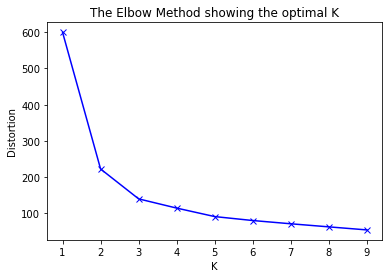

In [7]:
X = df_scaled 
inertia_arr = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)

plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

### 최적 클러스터 개수 = 3개

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [9]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [10]:
df['cluster_id'] = kmeans.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


## 차원축소 PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 유지할 구성요소 수 = n_components 
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

print('축소 전: ', df_scaled.shape)
print('축소 후: ', df_pca.shape)

축소 전:  (150, 4)
축소 후:  (150, 2)


In [12]:
df_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [13]:
cols = ['pc1', 'pc2']
df_pca = pd.DataFrame(data = df_pca, columns=cols)
df_pca

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [14]:
df_pca['species'] = df.species
df_pca['target'] = df.cluster_id
df_pca

,pc1,pc2,species,target
0,-2.264703,0.480027,setosa,0
1,-2.080961,-0.674134,setosa,0
2,-2.364229,-0.341908,setosa,0
3,-2.299384,-0.597395,setosa,0
4,-2.389842,0.646835,setosa,0
...,...,...,...,...
145,1.870503,0.386966,virginica,2
146,1.564580,-0.896687,virginica,1
147,1.521170,0.269069,virginica,2
148,1.372788,1.011254,virginica,2


## 시각화

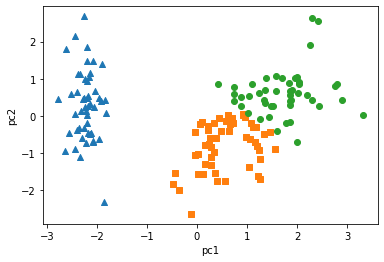

In [28]:
marker = ['^', 's', 'o']
for i, marker in enumerate(marker):
    x_val = df_pca[df_pca['target']==i]['pc1']
    y_val = df_pca[df_pca['target']==i]['pc2']
    plt.scatter(x_val, y_val, marker = marker)
    
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [16]:
df_pca['species'] = df_pca.species.map({'setosa':1, 'versicolor':2, 'virginica':0})
df_pca # species(정답)을 수치화. target은 KMeans가 예측한 정답. 

,pc1,pc2,species,target
0,-2.264703,0.480027,1,0
1,-2.080961,-0.674134,1,0
2,-2.364229,-0.341908,1,0
3,-2.299384,-0.597395,1,0
4,-2.389842,0.646835,1,0
...,...,...,...,...
145,1.870503,0.386966,0,2
146,1.564580,-0.896687,0,1
147,1.521170,0.269069,0,2
148,1.372788,1.011254,0,2


In [17]:
acc = 0
for i in range(len(df_pca)):
    if df_pca['species'][i]==df_pca['target'][i]:
        acc=acc+1

result = acc/len(df_pca)
print('정확도: ', result)

정확도:  0.07333333333333333


----
### 11주차 과제 (mae, mse, rmse 구하기) 
##### y = 2x + 50에 대하여 관측치 (2, 51), (3, 56), (5, 63), (6, 60), (10, 72)

In [18]:
dict_a = {2:54, 3:56, 5:60, 6:62, 10:70}
y_real = pd.Series(dict_a)

In [19]:
y_pred = [51,56,63,60,72]

In [20]:
y_pred = np.array(y_pred)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mae = mean_absolute_error(y_real, y_pred)
mse = mean_squared_error(y_real, y_pred)
rmse = np.sqrt(mse)

In [23]:
print(mae, mse, rmse)

2.0 5.2 2.280350850198276
